In [5]:
from sqlalchemy import create_engine
import pandas as pd

# MySQL database connection details
username = 'root'
password = 'root'
host = 'localhost'  # e.g., 'localhost'
port = '3306'  # MySQL default port is 3306
database = 'gdb023'

# Create an engine to connect to the MySQL database
engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}')

# Write your SQL query
query = """
    SELECT 
        c.customer_code,
        c.customer,
        ROUND(AVG(pid.pre_invoice_discount_pct), 4) AS average_discount_percentage
    FROM
        dim_customer c
    JOIN
        fact_pre_invoice_deductions pid ON c.customer_code = pid.customer_code
    WHERE
        pid.fiscal_year = 2021
        AND c.market = 'India'
    GROUP BY 
        c.customer_code, c.customer
    ORDER BY 
        average_discount_percentage DESC
    LIMIT 5
"""

# Execute the query and store the result in a DataFrame
df = pd.read_sql(query, engine)

# Convert the 'average_discount_percentage' from decimal to percentage
df['average_discount_percentage'] = df['average_discount_percentage'] * 100

# Show the result
print(df)


   customer_code  customer  average_discount_percentage
0       90002009  Flipkart                        30.83
1       90002006    Viveks                        30.38
2       90002003     Ezone                        30.28
3       90002002     Croma                        30.25
4       90002016   Amazon                         29.33


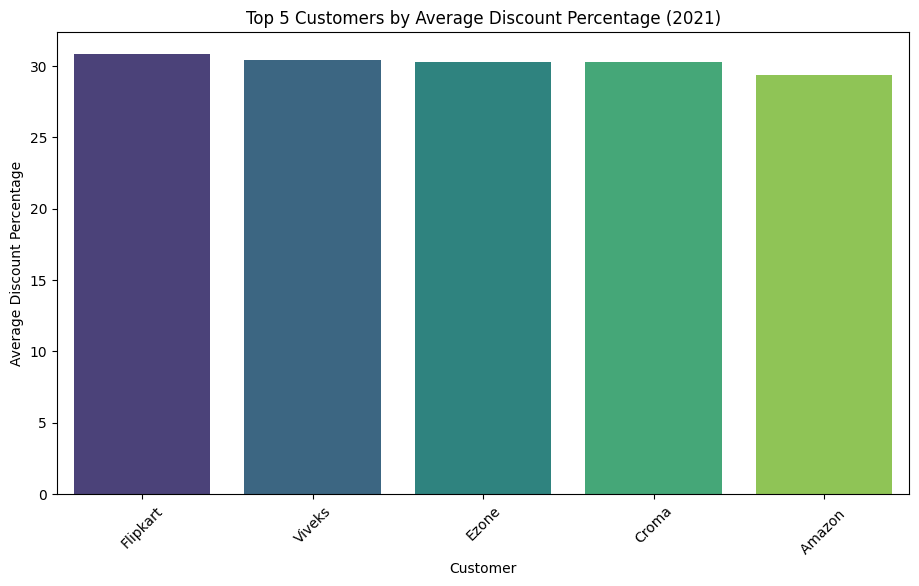

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the data using seaborn for better visualization
plt.figure(figsize=(11, 6))

# Create a barplot, setting hue to 'customer' and removing the legend
sns.barplot(x='customer', y='average_discount_percentage', hue='customer', data=df, palette='viridis', legend=False)

# Add labels and title
plt.xlabel('Customer')
plt.ylabel('Average Discount Percentage')
plt.title('Top 5 Customers by Average Discount Percentage (2021)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.savefig('average_discount_percentage_chart.png', dpi=300, bbox_inches='tight')


# Display the plot
plt.show()
